Load the Dataset from the Sklearn.datasets(Iris data)

In [19]:
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
y=iris.target

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

# Grid Search CV

In [21]:
from sklearn.model_selection import GridSearchCV
k_range=range(1,31)
param_dict=dict(n_neighbors=k_range)
param_dict

{'n_neighbors': range(1, 31)}

In [22]:
grid=GridSearchCV(knn,param_dict,cv=10,scoring="accuracy",return_train_score=False)
grid.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy')

In [23]:
import pandas as pd
pd.DataFrame(grid.cv_results_)[["mean_test_score","std_test_score","params"]]

,mean_test_score,std_test_score,params
0,0.960000,0.053333,{'n_neighbors': 1}
1,0.953333,0.052068,{'n_neighbors': 2}
2,0.966667,0.044721,{'n_neighbors': 3}
3,0.966667,0.044721,{'n_neighbors': 4}
4,0.966667,0.044721,{'n_neighbors': 5}
5,0.966667,0.044721,{'n_neighbors': 6}
6,0.966667,0.044721,{'n_neighbors': 7}
7,0.966667,0.044721,{'n_neighbors': 8}
8,0.973333,0.032660,{'n_neighbors': 9}
9,0.966667,0.044721,{'n_neighbors': 10}


Examine the Best results

In [18]:
print(grid.cv_results_["params"][0])
print(grid.cv_results_["mean_test_score"][0])

{'n_neighbors': 1}
0.96


Print the Array of mean scores

In [13]:
grid_mean_scores=grid.cv_results_["mean_test_score"]
grid_mean_scores

array([0.96      , 0.95333333, 0.96666667, 0.96666667, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.97333333, 0.96666667,
       0.96666667, 0.97333333, 0.98      , 0.97333333, 0.97333333,
       0.97333333, 0.97333333, 0.98      , 0.97333333, 0.98      ,
       0.96666667, 0.96666667, 0.97333333, 0.96      , 0.96666667,
       0.96      , 0.96666667, 0.95333333, 0.95333333, 0.95333333])

Plot the Results

Text(0, 0.5, 'Grid accuracy')

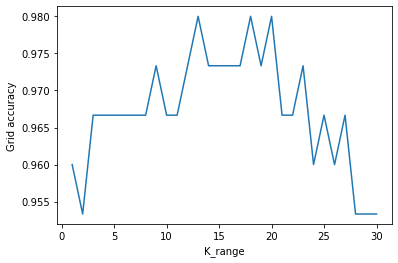

In [24]:
from matplotlib import pyplot as plt
plt.plot(k_range,grid_mean_scores)
plt.xlabel("K_range")
plt.ylabel("Grid accuracy")

Examine the Best Model

In [25]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9800000000000001
{'n_neighbors': 13}
KNeighborsClassifier(n_neighbors=13)


# Search Multiple Parametrs simultaneously

In [26]:
k_range=range(1,31)
weight_options=["uniform","distance"]

In [27]:
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']}


Instantiate and Fit the Model

In [28]:
grid=GridSearchCV(knn,param_grid,cv=10,scoring="accuracy",return_train_score=False)
grid.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

Examine the Best Model

In [29]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9800000000000001
{'n_neighbors': 13, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=13)


Using the Best parameters to make the Predictions

In [30]:
knn=KNeighborsClassifier(n_neighbors=13,weights="uniform")
knn.fit(X,y)
knn.predict([[4,5,4,3]])

array([1])

# Randomized Search CV

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
k_range=range(1,31)
param_dict=dict(n_neighbors=k_range,weights=weight_options)
param_dict

{'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']}

In [34]:
rand=RandomizedSearchCV(knn,param_dict,cv=10,n_iter=10,scoring="accuracy",return_train_score=False)
rand.fit(X,y)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=13),
                   param_distributions={'n_neighbors': range(1, 31),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [35]:
pd.DataFrame(rand.cv_results_)[["mean_test_score","std_test_score","params"]]

,mean_test_score,std_test_score,params
0,0.966667,0.044721,"{'weights': 'uniform', 'n_neighbors': 5}"
1,0.960000,0.053333,"{'weights': 'distance', 'n_neighbors': 1}"
2,0.973333,0.032660,"{'weights': 'distance', 'n_neighbors': 29}"
3,0.973333,0.032660,"{'weights': 'uniform', 'n_neighbors': 12}"
4,0.953333,0.042687,"{'weights': 'uniform', 'n_neighbors': 28}"
5,0.966667,0.044721,"{'weights': 'distance', 'n_neighbors': 8}"
6,0.960000,0.044222,"{'weights': 'uniform', 'n_neighbors': 24}"
7,0.966667,0.033333,"{'weights': 'distance', 'n_neighbors': 30}"
8,0.973333,0.032660,"{'weights': 'distance', 'n_neighbors': 14}"
9,0.966667,0.044721,"{'weights': 'uniform', 'n_neighbors': 7}"


In [36]:
#examine the best model
print(rand.best_score_)
print(rand.best_params_)
print(rand.best_estimator_)

0.9733333333333334
{'weights': 'distance', 'n_neighbors': 29}
KNeighborsClassifier(n_neighbors=29, weights='distance')


In [ ]:
best_scores=[]
for i in range(20):
    rand=RandomizedSearchCV(knn,param_dict,cv=10,scoring="accuracy",return_train_score=False)
    rand.fit(X,y)
    best_scores.append(round(rand.best_score_,4))
best_scores